In [28]:
#SE beta = 1
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
import math

def y_s(p,t):#using iteration to solve y^*
    eps = 1e-12 #epsilon
    y_st = 1 #initial y^*
    y_pre = 0
    while LA.norm(y_st-y_pre)>eps:
        y_pre = y_st
        y_st = np.tanh(p+np.sqrt(t)*y_pre)*np.sqrt(t)
    return y_st

def F(p, t):
    return y_s(p,t)/(np.sqrt(t))

def T(p, t):
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def se2(sigma2,sigma0,alpha_l,alpha_u):
    
    k_collect_se2 = []
    sigma2_collect_se2 = []
    chi_collect_se2 = []
    k_t = 0.01
    sigma_t2 = 0
    chi_t =0.1
    
    sigma_s2 = 1/sigma2
    eps = 1e-6
    parameter_old = np.array([k_t,sigma_t2,chi_t])
    parameter_new = np.array([1,1,1])
    iter_se2 = 0
    
    k_collect_se2.append(k_t)
    sigma2_collect_se2.append(sigma_t2)
    chi_collect_se2.append(chi_t)
    
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2,chi_t])
        sum_t = 0
        sum_f = 0
        sum_f2 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_t += np.exp(-1/2*z**2)*T(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2/sigma2)*z,chi_t/sigma2)/np.sqrt(2*np.pi)/10
            sum_f += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2/sigma2)*z,chi_t/sigma2)/np.sqrt(2*np.pi)/10
            sum_f2 += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2/sigma2)*z,chi_t/sigma2)**2/np.sqrt(2*np.pi)/10
        chi_new = 1/(1/sigma0 + (alpha_l+alpha_u)/sigma2- alpha_u*sum_t/sigma2)
        k_new = chi_t*(alpha_l/sigma2 + alpha_u*sum_f/sigma2)
        sigma_new = chi_t**2*(alpha_l/sigma2 + alpha_u*sum_f2/sigma2)
        parameter_new = np.array([k_new,sigma_new,chi_new])
        chi_collect_se2.append(chi_new)
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
        chi = chi_new
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2,sigma2_collect_se2,chi_collect_se2,iter_se2

In [29]:
print(se2(1,1,0,1)[0][-1])

KeyboardInterrupt: 

In [75]:
#beta = infinity
def se2(alpha_l,alpha_u,sigma_0,sigma2):
    sigma2_collect_se2 = []
    k_collect_se2 = []
    chi_collect_se2 = []
    chi_t = 0.1
    k_t = 0.01
    sigma_s2 = 1/sigma2
    #sigma_0 = 1
    #sigma_s2 = 1
    sigma_t2 = 0
    eps = 1e-8
    parameter_old = np.array([chi_t,k_t,sigma_t2])
    parameter_new = np.array([1,1,1])
    iter_se2 = 0
    chi_collect_se2.append(chi_t)
    k_collect_se2.append(k_t)
    sigma2_collect_se2.append(sigma_t2)
    
    def y_s(p,t):
        eps = 1e-12 #epsilon
        y_gst = 1 #initial y^*
        y_pre = 0
        while LA.norm(y_gst-y_pre)>eps:
            y_pre = y_gst
            y_st = np.tanh(p+np.sqrt(t)*y_pre)*np.sqrt(t)
        return y_gst
    def F(p,t): #F function
        return y_s(p,t)/(np.sqrt(t))
    
    def T(p,t): #T function
        return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))
    
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([chi_t,k_t,sigma_t2])
        sum_t_1 = 0
        #sum_t_2 = 0
        sum_f_1 = 0
        #sum_f_2 = 0
        sum_f2_1 = 0
        #sum_f2_2 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_t_1 += np.exp(-1/2*z**2)*T(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2/sigma2)*z,chi_t/sigma2)/np.sqrt(2*np.pi)/10
            #sum_t_2 += np.exp(-1/2*z**2)*T(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi_t)/np.sqrt(2*np.pi)/10
            sum_f_1 += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2/sigma2)*z,chi_t/sigma2)/np.sqrt(2*np.pi)/10
            #sum_f_2 += np.exp(-1/2*z**2)*F(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi_t)/np.sqrt(2*np.pi)/10
            sum_f2_1 += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2/sigma2)*z,chi_t/sigma2)**2/np.sqrt(2*np.pi)/10
            #sum_f2_2 += np.exp(-1/2*z**2)*F(-k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi_t)**2/np.sqrt(2*np.pi)/10
        chi_new = 1/(1/sigma_0 + alpha_l/sigma2 + alpha_u/sigma2 - alpha_u*sum_t_1/sigma2)
        k_new = chi_new*(alpha_l/sigma2 + alpha_u*sum_f_1/sigma2)
        sigma_new = chi_new**2*(alpha_l/sigma2 + alpha_u*sum_f2_1/sigma2)
        parameter_new = np.array([chi_new,k_new,sigma_new])
        chi_collect_se2.append(chi_new)
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
        chi_t = chi_new
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2,sigma2_collect_se2,chi_collect_se2,iter_se2

In [76]:
print(se2(1,3,3,10)[0][-1])

3.825703752684727e-08


In [306]:
#SE beta = 1
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
import math

def se2(alpha_l,alpha_u,sigma_0,sigma2):
    sigma2_collect_se2 = []
    k_collect_se2 = []
    #chi_collect_se2 = []
    chi = 1/(1/sigma_0 + (alpha_l+alpha_u)/sigma2)
    k_t = 0.01
    sigma_s2 = 1/sigma2
    #sigma_0 = 1
    #sigma_s2 = 1
    sigma_t2 = 0
    eps = 1e-8
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_se2 = 0
    k_collect_se2.append(k_t)
    sigma2_collect_se2.append(sigma_t2)
    
    
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_1 = 0
        sum_2 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_1 += np.exp(-1/2*z**2)*math.tanh(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2/sigma2)*z)/np.sqrt(2*np.pi)/10
            sum_2 += np.exp(-1/2*z**2)*(math.tanh(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2/sigma2)*z))**2/np.sqrt(2*np.pi)/10
            
        k_new = chi*(alpha_l/sigma2 + alpha_u*sum_1/sigma2)
        sigma_new = chi**2*(alpha_l/sigma2 + alpha_u*sum_2/sigma2)
        parameter_new = np.array([k_new,sigma_new])
        
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
    
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2,sigma2_collect_se2,iter_se2

In [307]:
se = se2(10,2,1,1)

In [308]:
print(se[0][-1],se[1][-1])

0.8473818158700646 0.06501095855092465


In [288]:
def Q(k,sigma):
    sigma_0 =1
    sigma2 = 1
    return k**2*sigma_0/np.sqrt(sigma2*(k**2*sigma_0+sigma))

In [289]:
Q(se[0][-1],se[1][-1])

0.811444548261007

In [183]:
np.sqrt(4.99000046186495e-16)

2.233830893748439e-08

In [184]:
7.469906601449187e-09/2.233830893748439e-08

0.3343989297647526

In [179]:
def Q(k,sigma):
    sigma_0 =1
    sigma2 = 1
    return k*sigma_0/np.sqrt(sigma2*(k**2*sigma_0+sigma))
def integrand(x):
    return np.exp(-x**2/2) / np.sqrt(2*np.pi)

# Perform the integration using the quad function
result, _ = quad(integrand, Q(se[0][-1],se[1][-1]), np.inf)
print("The result of the standard Gaussian integral is:", result)    

The result of the standard Gaussian integral is: 0.3755697678853019


In [276]:
import numpy as np
from scipy.integrate import quad

# Define the integrand (i.e., the standard Gaussian function)
def integrand(x):
    return x**2* np.exp(-x**2/2) / np.sqrt(2*np.pi)

# Perform the integration using the quad function
result, _ = quad(integrand, -np.inf, np.inf)

print("The result of the standard Gaussian integral is:", result)

The result of the standard Gaussian integral is: 1.000000000000001


In [272]:
def Q(k,sigma,sigma_0,sigma2):
    return k*sigme_0/np.sqrt(sigma2*(k**2*sigma_0+sigma))

In [405]:
#SE beta = 1
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad
import math

def se2(alpha_l,alpha_u,sigma_0,sigma2):
    sigma2_collect_se2 = []
    k_collect_se2 = []
    #chi_collect_se2 = []
    chi = 1/(1 + (alpha_l+alpha_u)/sigma2)
    k_t = 0.01
    sigma_s2 = 1/sigma2
    #sigma_0 = 1
    #sigma_s2 = 1
    sigma_t2 = 0
    eps = 1e-8
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_se2 = 0
    k_collect_se2.append(k_t)
    sigma2_collect_se2.append(sigma_t2)

    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        tanh_1 = 0
        tanh_2 = 0
        iter_se2 += 1
        x = 0
        def integrand(x):
            return x* np.exp(-x**2/2) / np.sqrt(2*np.pi)
        tanh_1 = integrand(math.tanh(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2/sigma2)*x))
        tanh_2 =  integrand(math.tanh(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2/sigma2)*x)**2)
        k_new = chi*(alpha_l/sigma2 + alpha_u*tanh_1/sigma2)
        sigma_new = chi**2*(alpha_l/sigma2 + alpha_u*tanh_2/sigma2)
        parameter_new = np.array([k_new,sigma_new])
        
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
    
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2,sigma2_collect_se2,iter_se2

In [410]:
se1 = se2(0,1,0.5,0.5)

In [411]:
print(se1[0][-1],se1[1][-1])

9.299762094662044e-09 1.0839359384305877e-16


In [439]:
#SE beta = 1
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
import math

def se2(alpha_l,alpha_u,sigma_0,sigma2):
    sigma2_collect_se2 = []
    k_collect_se2 = []
    #chi_collect_se2 = []
    chi = 1/(1/sigma_0 + (alpha_l+alpha_u)/sigma2)
    k_t = 0.01
    sigma_s2 = 1/sigma2
    #sigma_0 = 1
    #sigma_s2 = 1
    sigma_t2 = 0
    eps = 1e-8
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_se2 = 0
    k_collect_se2.append(k_t)
    sigma2_collect_se2.append(sigma_t2)
    
    
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_1 = 0
        sum_2 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_1 += np.exp(-1/2*z**2)*math.tanh(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2/sigma2)*z)/np.sqrt(2*np.pi)/10
            sum_2 += np.exp(-1/2*z**2)*(math.tanh(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2/sigma2)*z))**2/np.sqrt(2*np.pi)/10
            
        k_new = chi*(alpha_l/sigma2 + alpha_u*sum_1/sigma2)
        sigma_new = chi**2*(alpha_l/sigma2 + alpha_u*sum_2/sigma2)
        parameter_new = np.array([k_new,sigma_new])
        
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
    
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2,sigma2_collect_se2,iter_se2

In [440]:
se = se2(1,1,1,1)

In [441]:
print(se[0][-1],se[1][-1])

0.4459196070775382 0.14380226771694835


In [442]:
len(se[0])

12

In [443]:
len(se[1])

12

In [446]:
#collcetion of AMP2
p_collect_amp2 = []
s_collect_amp2 = []
k_collect_amp2 = []
sigma2_collect_amp2 = []

#sampling
n = 300  # dimension
m = 300  # unlabeled data

alpha_u = m/n

s_Ori = np.ones(n)
mean1 = -1/np.sqrt(n)*np.ones(n) # s_0 = [1,...,1], sigma_s2 = s_0^2/n =1
mean2 = 1/np.sqrt(n)*np.ones(n)
cov = np.identity(n)
x = np.zeros((m, n))
for i in range(m):
    if random.uniform(0, 1) > 0.5:
        x[i] = np.random.multivariate_normal(mean2, cov)
    else:
        x[i] = np.random.multivariate_normal(mean1, cov)
        
m_la = 300 #labeled data
alpha_l = m_la/n

x_data = np.zeros((m_la, n))
y_label = np.zeros(m_la)
for i in range(m_la):
    if random.uniform(0, 1) > 0.5:
        y_label[i] = 1
        x_data[i] = np.random.multivariate_normal(mean2, cov)
    else:
        y_label[i] = -1
        x_data[i] = np.random.multivariate_normal(mean1, cov)
        
def update_p_1(s, p):
    chi = 1/(1 + alpha_l+alpha_u)
    p_d = np.zeros(m)
    for u in range(m):
        p_d[u] = (1/np.sqrt(n))*x[u]@s - chi*math.tanh(p[u])
    return p_d

def update_s_1(s, p):
    chi = 1/(1 + alpha_l+alpha_u)
    s_d = np.zeros(n)
    for i in range(n):
        sum_ = 0
        sum_l = 0
        for j in range(m):
            sum_ += chi*((1/np.sqrt(n))*x[j][i]*math.tanh(p[j]) -(1/n)*s[i]*x[j][i]**2*(1-(math.tanh(p[j]))**2))
        for k in range(m_la):    
            sum_l += chi*x_data[k][i]*y_label[k]/np.sqrt(n)
        s_d[i] = sum_l+ sum_
    return s_d

def amp2_1():
    chi = 1/(1 + alpha_l+alpha_u)
    s_0 = np.zeros(n)  
    p_0 = np.zeros(m)
    eps=1e-6
    iter_amp2 = 0
    p_new = np.zeros(m)
    s_new = 0.01*np.ones(n)
    def sigma2_update(s_new):
        sigma2_up = 0
        for i in range(n):
            sigma2_up += LA.norm(s_new[i] - k_collect_amp2[iter_amp2])**2/n
        return sigma2_up
    while LA.norm(s_new[0] - s_0[0])>eps:
        p_collect_amp2.append(p_new)
        s_collect_amp2.append(s_new)
        k_collect_amp2.append(s_new@s_Ori/n)
        sigma2_collect_amp2.append(sigma2_update(s_new))
        s_0 = s_new
        p_0 = p_new
        p_new = update_p_1(s_0,p_0)
        s_new = update_s_1(s_0,p_new)
        iter_amp2 +=1
    return s_collect_amp2,p_collect_amp2,k_collect_amp2,sigma2_collect_amp2,iter_amp2

In [447]:
amp = amp2_1()

In [448]:
print(amp[2][-1],amp[3][-1])

0.46717165526492577 0.14798091096917132


In [449]:
len(amp[2])

13

In [450]:
len(amp[3])

13

In [453]:
idx = []
l =min(len(amp[2]),len(se[0]))
for i in range(l):
    idx.append(i)

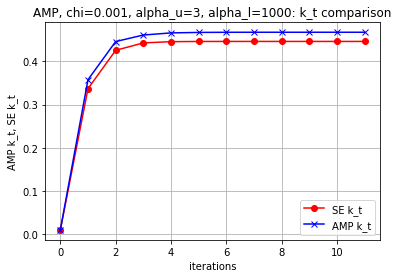

In [456]:
#figure-1    
plt.plot(idx,se[0][:l],c="r",label="SE k_t",marker="o")
plt.plot(idx,amp[2][:l],c="b",label="AMP k_t",marker="x")
plt.title("AMP, chi=0.001, alpha_u=3, alpha_l=1000: k_t comparison")
plt.ylabel("AMP k_t, SE k_t")

plt.xlabel("iterations")
plt.grid()
plt.legend()
plt.show()

In [469]:
#beta = 1 and infinity comparison
#SE beta = 1
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
import math

def se2_1(alpha_l,alpha_u,sigma_0,sigma2):
    sigma2_collect_se2 = []
    k_collect_se2 = []
    #chi_collect_se2 = []
    chi = 1/(1/sigma_0 + (alpha_l+alpha_u)/sigma2)
    print(chi)
    k_t = 0.01
    sigma_s2 = sigma_0/sigma2
    #sigma_0 = 1
    #sigma_s2 = 1
    sigma_t2 = 0
    eps = 1e-8
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_se2 = 0
    k_collect_se2.append(k_t)
    sigma2_collect_se2.append(sigma_t2)
    
    
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_1 = 0
        sum_2 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_1 += np.exp(-1/2*z**2)*math.tanh(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2/sigma2)*z)/np.sqrt(2*np.pi)/10
            sum_2 += np.exp(-1/2*z**2)*(math.tanh(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2/sigma2)*z))**2/np.sqrt(2*np.pi)/10
            
        k_new = chi*(alpha_l/sigma2 + alpha_u*sum_1/sigma2)
        sigma_new = chi**2*(alpha_l/sigma2 + alpha_u*sum_2/sigma2)
        parameter_new = np.array([k_new,sigma_new])
        
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
    
        k_t = k_new
        sigma_t2 = sigma_new
    return k_collect_se2,sigma2_collect_se2,iter_se2

In [523]:
se1 = se2_1(1,1,1,1)

0.3333333333333333


In [524]:
print(se1[0][-1],se1[1][-1])

0.4459196070775382 0.14380226771694835


In [505]:
def se2_infty(alpha_l,alpha_u,sigma_0,sigma2):
    sigma2_collect_se2 = []
    k_collect_se2 = []
    chi_collect_se2 = []
    chi_t = 0.1
    k_t = 0.01
    sigma_s2 = 1
    sigma_t2 = 0
    eps = 1e-8
    parameter_old = np.array([chi_t,k_t,sigma_t2])
    parameter_new = np.array([1,1,1])
    iter_se2 = 0
    chi_collect_se2.append(chi_t)
    k_collect_se2.append(k_t)
    sigma2_collect_se2.append(sigma_t2)
    
    def y_s(p,t):
        eps = 1e-12 #epsilon
        y_gst = 1 #initial y^*
        y_pre = 0
        while LA.norm(y_gst-y_pre)>eps:
            y_pre = y_gst
            y_st = np.tanh(p+np.sqrt(t)*y_pre)*np.sqrt(t)
        return y_gst
    def F(p,t): #F function
        return y_s(p,t)/(np.sqrt(t))
    
    def T(p,t): #T function
        return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))
    
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([chi_t,k_t,sigma_t2])
        sum_t_1 = 0
        sum_f_1 = 0
        sum_f2_1 = 0
        iter_se2 += 1
        for z in np.arange(-10,10,0.1):
            sum_t_1 += np.exp(-1/2*z**2)*T(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi_t)/np.sqrt(2*np.pi)/10
            sum_f_1 += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi_t)/np.sqrt(2*np.pi)/10
            sum_f2_1 += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi_t)**2/np.sqrt(2*np.pi)/10
        chi_new = 1/(1 + alpha_l + alpha_u - alpha_u*sum_t_1)
        k_new = chi_new*(alpha_l + alpha_u*sum_f_1)
        sigma_new = chi_new**2*(alpha_l + alpha_u*sum_f2_1)
        parameter_new = np.array([chi_new,k_new,sigma_new])
        chi_collect_se2.append(chi_new)
        k_collect_se2.append(k_new)
        sigma2_collect_se2.append(sigma_new)
        chi_t = chi_new
        k_t = k_new
        sigma_t2 = sigma_new
    return chi_collect_se2,k_collect_se2,sigma2_collect_se2,iter_se2

In [520]:
se2 = se2_infty(1,1,1,1)

In [521]:
print(se2[1][-1],se2[2][-1])

0.6118764037163029 0.21717692163186736


In [522]:
print(se2[0][-1])

0.183503413257301
